# Isocoumarin in Orthosporin
## Similarity Maps vs Substructure Highlighting

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
from IPython.display import SVG
import io
from PIL import Image
import numpy as np
import rdkit
print(rdkit.__version__)

2025.09.1


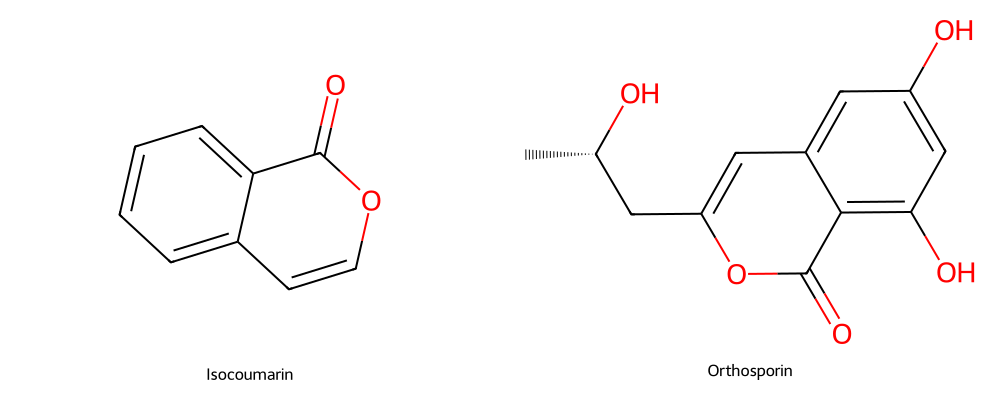

In [11]:
iscoumarin_smiles = "C1=CC=C2C(=C1)C=COC2=O"
orthosporin_smiles = "C[C@@H](CC1=CC2=CC(=CC(=C2C(=O)O1)O)O)O"
Draw.MolsToGridImage([Chem.MolFromSmiles(iscoumarin_smiles), Chem.MolFromSmiles(orthosporin_smiles)], molsPerRow=2, subImgSize=(500, 400), legends=["Isocoumarin", "Orthosporin"])

In [36]:
# Method 1: Proper substructure highlighting
isocoumarin = Chem.MolFromSmiles(iscoumarin_smiles)
orthosporin = Chem.MolFromSmiles(orthosporin_smiles)

# Find the substructure match
match = orthosporin.GetSubstructMatch(isocoumarin)

if match:
    print(f"Isocoumarin substructure found at atoms: {match}")
    
    # Create the drawing with substructure highlight
    d = Draw.MolDraw2DCairo(500, 400)
    d.drawOptions().addStereoAnnotation = True
    
    # Highlight the matched atoms
    d.DrawMolecule(orthosporin, highlightAtoms=list(match))
    d.FinishDrawing()
    
    def show_png(data):
        bio = io.BytesIO(data)
        img = Image.open(bio)
        return img
    
    show_png(d.GetDrawingText())
else:
    print("No substructure match found!")

Isocoumarin substructure found at atoms: (7, 8, 9, 10, 5, 6, 4, 3, 13, 11, 12)


In [37]:
# Method 2: Customized highlight colors
# You can customize the highlight color and appearance

# Get the substructure match
match = orthosporin.GetSubstructMatch(isocoumarin)

if match:
    # Create drawing with custom highlight color
    d = Draw.MolDraw2DCairo(500, 400)
    d.drawOptions().addStereoAnnotation = True
    
    # Set custom highlight color (light green with transparency)
    # Color format is (R, G, B, Alpha) with values from 0 to 1
    d.drawOptions().setHighlightColour((0.6, 1.0, 0.6, 0.5))  # Light green
    
    d.DrawMolecule(orthosporin, highlightAtoms=list(match), legend="Isocoumarin in Orthosporin")
    d.FinishDrawing()
    
    show_png(d.GetDrawingText())


[13:42:47] DEPRECATION WARNING: please use MorganGenerator
[13:42:47] DEPRECATION WARNING: please use MorganGenerator


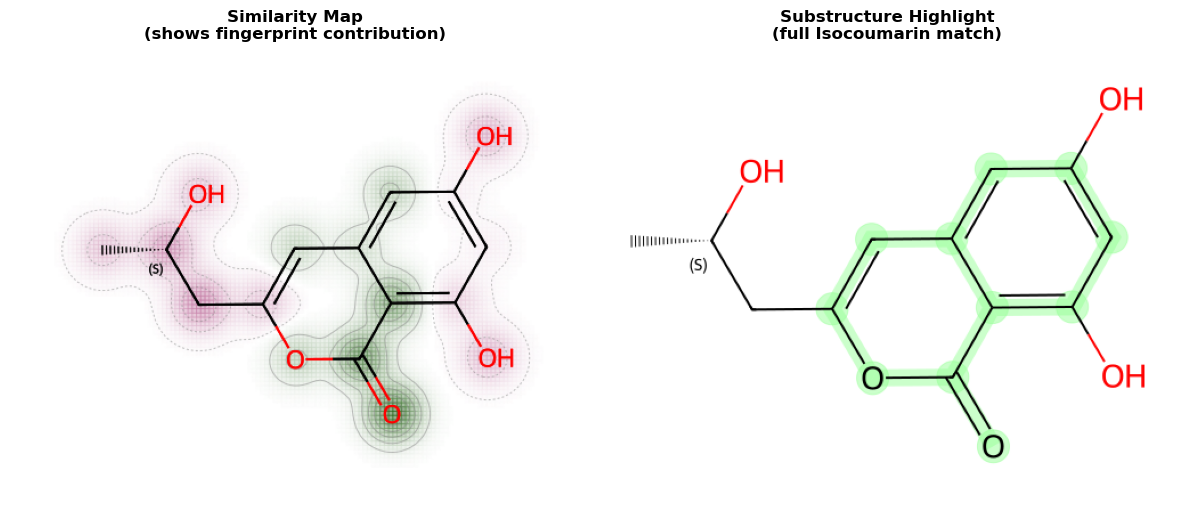


✓ Isocoumarin substructure atoms in Orthosporin: (7, 8, 9, 10, 5, 6, 4, 3, 13, 11, 12)


In [38]:
# Comparison: Similarity Map vs Substructure Highlight
from PIL import Image
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: Similarity Map
d1 = Draw.MolDraw2DCairo(500, 400)
d1.drawOptions().addStereoAnnotation = True
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(
    isocoumarin, orthosporin, 
    lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2, fpType='bv'), 
    draw2d=d1
)
d1.DrawMolecule(orthosporin)
d1.FinishDrawing()
img1 = Image.open(io.BytesIO(d1.GetDrawingText()))
axes[0].imshow(img1)
axes[0].set_title("Similarity Map\n(shows fingerprint contribution)", fontsize=12, fontweight='bold')
axes[0].axis('off')

# Right: Substructure Highlight
match = orthosporin.GetSubstructMatch(isocoumarin)
d2 = Draw.MolDraw2DCairo(500, 400)
d2.drawOptions().addStereoAnnotation = True
d2.drawOptions().setHighlightColour((0.6, 1.0, 0.6, 0.5))
d2.DrawMolecule(orthosporin, highlightAtoms=list(match))
d2.FinishDrawing()
img2 = Image.open(io.BytesIO(d2.GetDrawingText()))
axes[1].imshow(img2)
axes[1].set_title("Substructure Highlight\n(full Isocoumarin match)", fontsize=12, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"\n✓ Isocoumarin substructure atoms in Orthosporin: {match}")


In [39]:
# Method 3: Highlight both atoms AND bonds of the substructure
# This provides an even clearer visualization

match = orthosporin.GetSubstructMatch(isocoumarin)

if match:
    # Get the bonds that are part of the substructure
    match_bonds = []
    for bond in orthosporin.GetBonds():
        if bond.GetBeginAtomIdx() in match and bond.GetEndAtomIdx() in match:
            match_bonds.append(bond.GetIdx())
    
    # Create drawing with both atom and bond highlights
    d = Draw.MolDraw2DCairo(500, 400)
    d.drawOptions().addStereoAnnotation = True
    d.drawOptions().setHighlightColour((0.6, 1.0, 0.6, 0.5))  # Light green
    
    d.DrawMolecule(orthosporin, 
                   highlightAtoms=list(match), 
                   highlightBonds=match_bonds,
                   legend="Isocoumarin (atoms + bonds)")
    d.FinishDrawing()
    
    show_png(d.GetDrawingText())
    
    print(f"Matched atoms: {match}")
    print(f"Matched bonds: {match_bonds}")


Matched atoms: (7, 8, 9, 10, 5, 6, 4, 3, 13, 11, 12)
Matched bonds: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 17]


## Key Differences:

**Similarity Map** (`SimilarityMaps.GetSimilarityMapForFingerprint`):
- Colors atoms by their **contribution to fingerprint similarity**
- Uses Morgan fingerprint local environments (radius=2)
- Green = increases similarity, Pink/Red = decreases similarity
- Gaussian smoothing causes colors to "bleed" to neighbors
- **Not a substructure match** - shows feature importance

**Substructure Highlight** (`GetSubstructMatch` + `highlightAtoms`):
- Uniformly highlights **all atoms matching the query structure**
- Uses exact graph isomorphism matching
- All matched atoms get the same highlight color
- Shows the actual isocoumarin core in orthosporin
- **This is what you want for showing the full structure**

### Usage Tips:
- Use `.setHighlightColour((R, G, B, Alpha))` to customize colors (values 0-1)
- Include `highlightBonds` for clearer visualization
- Common colors: green `(0.6, 1.0, 0.6, 0.5)`, blue `(0.6, 0.6, 1.0, 0.5)`, yellow `(1.0, 1.0, 0.6, 0.5)`


# Tetralone in Isosclerone
## Similarity Maps vs Substructure Highlighting

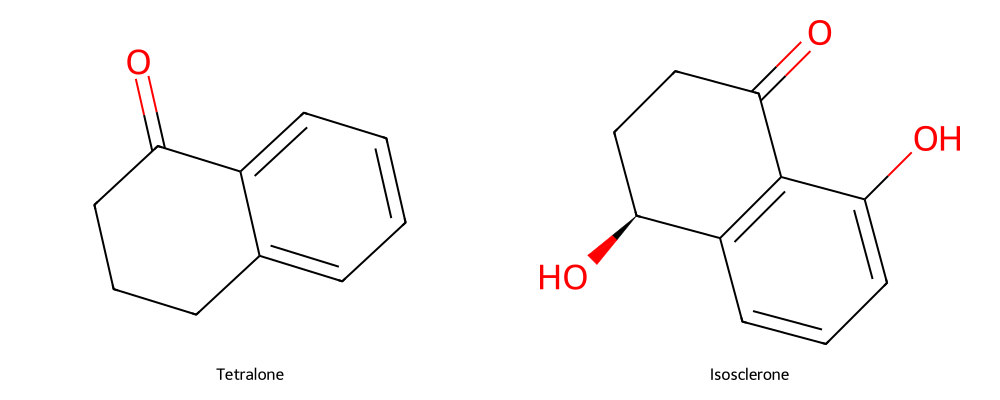

In [40]:
tetralone_smiles = "C1CC2=CC=CC=C2C(=O)C1"
isosclerone_smiles = "C1CC(=O)C2=C([C@H]1O)C=CC=C2O"
Draw.MolsToGridImage([Chem.MolFromSmiles(tetralone_smiles), Chem.MolFromSmiles(isosclerone_smiles)], molsPerRow=2, subImgSize=(500, 400), legends=["Tetralone", "Isosclerone"])


In [41]:
# Method 1: Proper substructure highlighting
tetralone = Chem.MolFromSmiles(tetralone_smiles)
isosclerone = Chem.MolFromSmiles(isosclerone_smiles)

# Find the substructure match
match = isosclerone.GetSubstructMatch(tetralone)

if match:
    print(f"Tetralone substructure found at atoms: {match}")
    
    # Create the drawing with substructure highlight
    d = Draw.MolDraw2DCairo(500, 400)
    d.drawOptions().addStereoAnnotation = True
    
    # Highlight the matched atoms
    d.DrawMolecule(isosclerone, highlightAtoms=list(match))
    d.FinishDrawing()
    
    def show_png(data):
        bio = io.BytesIO(data)
        img = Image.open(bio)
        return img
    
    show_png(d.GetDrawingText())
else:
    print("No substructure match found!")


Tetralone substructure found at atoms: (0, 6, 5, 8, 9, 10, 11, 4, 2, 3, 1)


In [42]:
# Method 2: Customized highlight colors
# Get the substructure match
match = isosclerone.GetSubstructMatch(tetralone)

if match:
    # Create drawing with custom highlight color
    d = Draw.MolDraw2DCairo(500, 400)
    d.drawOptions().addStereoAnnotation = True
    
    # Set custom highlight color (light blue with transparency)
    d.drawOptions().setHighlightColour((0.6, 0.6, 1.0, 0.5))  # Light blue
    
    d.DrawMolecule(isosclerone, highlightAtoms=list(match), legend="Tetralone in Isosclerone")
    d.FinishDrawing()
    
    show_png(d.GetDrawingText())


[14:17:31] DEPRECATION WARNING: please use MorganGenerator
[14:17:31] DEPRECATION WARNING: please use MorganGenerator


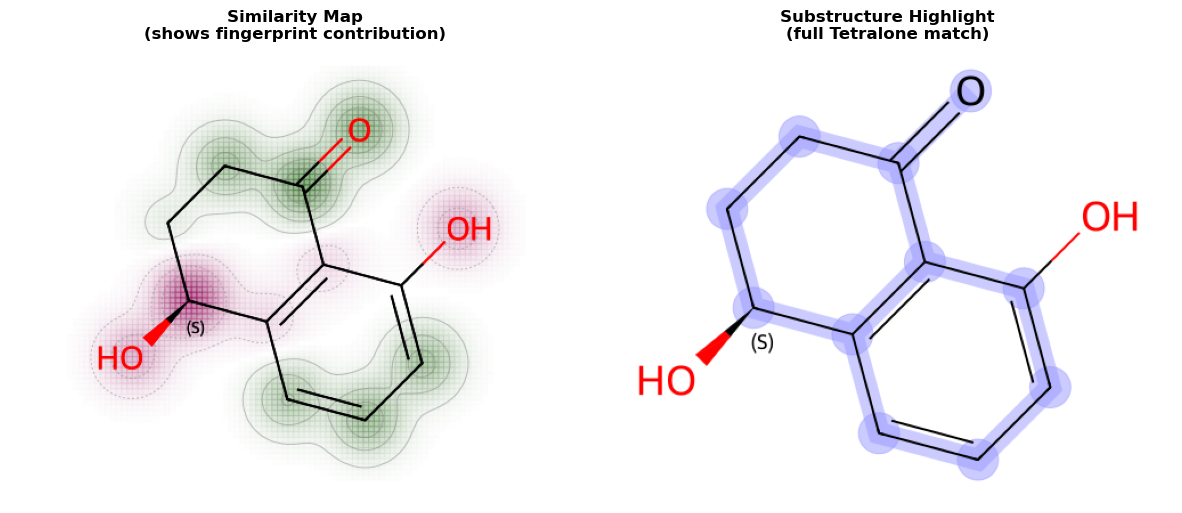


✓ Tetralone substructure atoms in Isosclerone: (0, 6, 5, 8, 9, 10, 11, 4, 2, 3, 1)


In [43]:
# Comparison: Similarity Map vs Substructure Highlight
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: Similarity Map
d1 = Draw.MolDraw2DCairo(500, 400)
d1.drawOptions().addStereoAnnotation = True
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(
    tetralone, isosclerone, 
    lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2, fpType='bv'), 
    draw2d=d1
)
d1.DrawMolecule(isosclerone)
d1.FinishDrawing()
img1 = Image.open(io.BytesIO(d1.GetDrawingText()))
axes[0].imshow(img1)
axes[0].set_title("Similarity Map\n(shows fingerprint contribution)", fontsize=12, fontweight='bold')
axes[0].axis('off')

# Right: Substructure Highlight
match = isosclerone.GetSubstructMatch(tetralone)
d2 = Draw.MolDraw2DCairo(500, 400)
d2.drawOptions().addStereoAnnotation = True
d2.drawOptions().setHighlightColour((0.6, 0.6, 1.0, 0.5))  # Light blue
d2.DrawMolecule(isosclerone, highlightAtoms=list(match))
d2.FinishDrawing()
img2 = Image.open(io.BytesIO(d2.GetDrawingText()))
axes[1].imshow(img2)
axes[1].set_title("Substructure Highlight\n(full Tetralone match)", fontsize=12, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"\n✓ Tetralone substructure atoms in Isosclerone: {match}")


In [44]:
# Method 3: Highlight both atoms AND bonds of the substructure
match = isosclerone.GetSubstructMatch(tetralone)

if match:
    # Get the bonds that are part of the substructure
    match_bonds = []
    for bond in isosclerone.GetBonds():
        if bond.GetBeginAtomIdx() in match and bond.GetEndAtomIdx() in match:
            match_bonds.append(bond.GetIdx())
    
    # Create drawing with both atom and bond highlights
    d = Draw.MolDraw2DCairo(500, 400)
    d.drawOptions().addStereoAnnotation = True
    d.drawOptions().setHighlightColour((0.6, 0.6, 1.0, 0.5))  # Light blue
    
    d.DrawMolecule(isosclerone, 
                   highlightAtoms=list(match), 
                   highlightBonds=match_bonds,
                   legend="Tetralone (atoms + bonds)")
    d.FinishDrawing()
    
    show_png(d.GetDrawingText())
    
    print(f"Matched atoms: {match}")
    print(f"Matched bonds: {match_bonds}")


Matched atoms: (0, 6, 5, 8, 9, 10, 11, 4, 2, 3, 1)
Matched bonds: [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 13]


In [31]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
import rdkit
print(rdkit.__version__)

2025.09.1
